<a href="https://colab.research.google.com/github/jfzr99/Capstone-/blob/main/Mental_health_analysis_(481).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Social Media Usage and Mental Health Correlation

The study uses a 7-variable survey with 12 Likert scale questions (ranging from 0 to 5 for low to high) to explore the link between social media usage and mental health. It aims to:

1.   Identify a correlation: Is there a connection
between how much someone uses social media and their mental well-being?
2.   Predict mental health issues: Using the survey data, can we develop a model to predict whether someone might be experiencing mental health symptoms and needs further evaluation?

#Data Overview


In [ ]:
#Importing libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/TETRIS Program/Capstone/smmh.csv')
pd.set_option("display.max_columns", None)
data

Mounted at /content/drive


,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,4,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,1,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,3,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,3,2,3,3,2,2,3,4,4,5,4


In [ ]:
#Dimension of the data
data.shape

(481, 21)

##Analysis Overview

###Analysis Question

1.   Identify a correlation: Is there a connection
between how much someone uses social media and their mental well-being?
2.   Predict mental health issues: Using the survey data, can we develop a model to predict whether someone might be experiencing mental health symptoms and needs further evaluation?

###Analysis Variable

*Independent Variable*
*   Social Media Usage Time

*Dependent Variable* :
*   Any variable other than usage time


Variables

1. Age
2. Gender
3. Relationship Status
4. Occupation Status
5. Affiliated Organizations
6. Social Medias Used
7. Time spent - social media use, in hours


These questions were succeeded by standard inquiries during the evaluation of symptoms related to common mental health issues that could be find on [MHA](https://screening.mhanational.org/) (Mental Health America) screening questions

1.   Purposeless use of Social Media [ADHD] - Question 9
2.   Distracted by Social Media [ADHD] - Question 10
3. Restlessness if Social Media not used [Anxiety] - Question 11
4. Ease of Distraction by Social Media [ADHD] - Question 12
5. Bothered by worries [Anxiety] - Question 13
6. Difficulty in concentrating [ADHD] - Question 14
7. Comparison of self to peers [Self Esteem] - Question 15
8. Feelings about above comparison [Self Esteem] - Question 16
9. Validation sought from Social Media [Self Esteem] - Question 17
10. Feelings of Depression [Depression] - Question 18
11. Fluctuation of interest [Depression] - Question 19
12. Sleep Issues [Depression] - Question 20



# Data Pre-processing and Cleaning

### Missing Value Detection and Treatment




This value is considered as missing value
1. Blank Values
2. NaN
3. null

###Renaming & Re-arranging the columns

Renaming the column based on the related common mental health issue category

In [ ]:
data.rename(columns = {'1. What is your age?':'Age','2. Gender':'Sex','3. Relationship Status':'Status',
                       '4. Occupation Status':'Occupation',
                       '5. What type of organizations are you affiliated with?':'Affiliations',
                       '6. Do you use social media?':'Social Media User?',
                       '7. What social media platforms do you commonly use?':'Platforms Used',
                       '8. What is the average time you spend on social media every day?':'Time Spent',
                       '9. How often do you find yourself using Social media without a specific purpose?':'ADHD Q1',
                       '10. How often do you get distracted by Social media when you are busy doing something?':'ADHD Q2',
                       "11. Do you feel restless if you haven't used Social media in a while?":'Anxiety Q1',
                       '12. On a scale of 1 to 5, how easily distracted are you?':'ADHD Q3',
                       '13. On a scale of 1 to 5, how much are you bothered by worries?':'Anxiety Q2',
                       '14. Do you find it difficult to concentrate on things?':'ADHD Q4',
                       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Self Esteem Q1',
                       '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'Self Esteem Q2',
                       '17. How often do you look to seek validation from features of social media?':'Self Esteem Q3',
                       '18. How often do you feel depressed or down?':'Depression Q1',
                       '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Depression Q2',
                       '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Depression Q3' },inplace=True)

In [ ]:
#Re-arranging the columns
titles = list(data.columns)
titles

['Timestamp',
 'Age',
 'Sex',
 'Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Time Spent',
 'ADHD Q1',
 'ADHD Q2',
 'Anxiety Q1',
 'ADHD Q3',
 'Anxiety Q2',
 'ADHD Q4',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3']

In [ ]:
titles[11], titles[12] = titles[12], titles[11]
titles[12], titles[14] = titles[14], titles[12]
titles[13], titles[14] = titles[14], titles[13]
data = data[titles]
titles

['Timestamp',
 'Age',
 'Sex',
 'Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Time Spent',
 'ADHD Q1',
 'ADHD Q2',
 'ADHD Q3',
 'ADHD Q4',
 'Anxiety Q1',
 'Anxiety Q2',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           481 non-null    object 
 1   Age                 481 non-null    float64
 2   Sex                 481 non-null    object 
 3   Status              481 non-null    object 
 4   Occupation          481 non-null    object 
 5   Affiliations        451 non-null    object 
 6   Social Media User?  481 non-null    object 
 7   Platforms Used      481 non-null    object 
 8   Time Spent          481 non-null    object 
 9   ADHD Q1             481 non-null    int64  
 10  ADHD Q2             481 non-null    int64  
 11  ADHD Q3             481 non-null    int64  
 12  ADHD Q4             481 non-null    int64  
 13  Anxiety Q1          481 non-null    int64  
 14  Anxiety Q2          481 non-null    int64  
 15  Self Esteem Q1      481 non-null    int64  
 16  Self Est

The affiliations are the only data that has blank values, since individuals may not affiliating with anything

###Drop unnecessary column

Given that we will specifically examine the influence of social media on users and their mental well-being, we will solely focus on the social media platforms listed under the 'Social Media User?' column.

In [ ]:
User=set(data['Social Media User?'])
print(User)

{'No', 'Yes'}


In [ ]:
data = data[data['Social Media User?'] != 'No']
print(User)

{'No', 'Yes'}


Since we already make sure that all data are social media user, we can drop the column

In [ ]:
data = data.drop(['Social Media User?'],axis=1)

Also since the scope of this analysis is to University student, the affiliation column are also unnecessary

In [ ]:
data = data.drop(['Affiliations'],axis=1)

##Data Transformation

###Gender

The questionnaire was filled with multiple gender options, to simplifying this and avoid complications, we gonna devide gender into only 3 categories

In [ ]:
genders = set(data['Sex'])
print(genders)

{'Non-binary', 'There are others???', 'NB', 'Non binary ', 'Female', 'Nonbinary ', 'unsure ', 'Trans', 'Male'}


In [ ]:
#Combining the unique entries that all fall under the "Others" category
data.replace('Non-binary','Others', inplace=True)
data.replace('Nonbinary ','Others', inplace=True)
data.replace('NB','Others', inplace=True)
data.replace('unsure ','Others', inplace=True)
data.replace('Non binary ','Others', inplace=True)
data.replace('Trans','Others', inplace=True)
data.replace('There are others???','Others', inplace=True)

In [ ]:
genders = set(data['Sex'])
print(genders)

{'Male', 'Female', 'Others'}


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 480
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       478 non-null    object 
 1   Age             478 non-null    float64
 2   Sex             478 non-null    object 
 3   Status          478 non-null    object 
 4   Occupation      478 non-null    object 
 5   Platforms Used  478 non-null    object 
 6   Time Spent      478 non-null    object 
 7   ADHD Q1         478 non-null    int64  
 8   ADHD Q2         478 non-null    int64  
 9   ADHD Q3         478 non-null    int64  
 10  ADHD Q4         478 non-null    int64  
 11  Anxiety Q1      478 non-null    int64  
 12  Anxiety Q2      478 non-null    int64  
 13  Self Esteem Q1  478 non-null    int64  
 14  Self Esteem Q2  478 non-null    int64  
 15  Self Esteem Q3  478 non-null    int64  
 16  Depression Q1   478 non-null    int64  
 17  Depression Q2   478 non-null    int

In [ ]:
#Converting age data type to int64
data['Age'] = data['Age'].astype('int64')

In [ ]:
data.describe()

,Age,ADHD Q1,ADHD Q2,ADHD Q3,ADHD Q4,Anxiety Q1,Anxiety Q2,Self Esteem Q1,Self Esteem Q2,Self Esteem Q3,Depression Q1,Depression Q2,Depression Q3
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,26.098326,3.560669,3.334728,3.359833,3.257322,2.598326,3.571130,2.843096,2.776151,2.464435,3.267782,3.177824,3.213389
std,9.881942,1.090977,1.319459,1.171024,1.342226,1.254659,1.278004,1.404718,1.055134,1.246290,1.307713,1.255499,1.458176
min,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,22.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,26.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000
max,91.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
#Look at the median of the data
data.median(numeric_only=True)

Age               22.0
ADHD Q1            4.0
ADHD Q2            3.0
ADHD Q3            3.0
ADHD Q4            3.0
Anxiety Q1         3.0
Anxiety Q2         4.0
Self Esteem Q1     3.0
Self Esteem Q2     3.0
Self Esteem Q3     2.0
Depression Q1      3.0
Depression Q2      3.0
Depression Q3      3.0
dtype: float64

###Create new column for categorizing and aggregating the survey score

To ensure the validity of this research, it is necessary to compute the cumulative points obtained from the diverse questions addressing various facets of mental health and well-being.

The questions evaluate four dimensions of mental well-being:

1. Attention Deficit Hyperactivity Disorder (ADHD)
2. Anxiety
3. Self Esteem
4. Depression

Accordingly, distinct columns are generated for each of the four dimensions, alongside an additional column titled "Total Score." This column is designated to accumulate the sum of points from all questions, representing a numerical value that can reach a maximum of 59.

In [ ]:
#Summing scores from ADHD, Anxiety, Self Esteem and Depression individually and creating a new column

ADHD = ['ADHD Q1', 'ADHD Q2', 'ADHD Q3', 'ADHD Q4']
data['ADHD Score'] = data[ADHD].sum(axis=1)

Anxiety = ['Anxiety Q1', 'Anxiety Q2']
data['Anxiety Score'] = data[Anxiety].sum(axis=1)

SelfEsteem = ['Self Esteem Q1', 'Self Esteem Q2','Self Esteem Q3']
data['Self Esteem Score'] = data[SelfEsteem].sum(axis=1)

Depression = ['Depression Q1', 'Depression Q2','Depression Q3']
data['Depression Score'] = data[Depression].sum(axis=1)

Total = ['ADHD Score', 'Anxiety Score','Self Esteem Score','Depression Score']
data['Total Score'] = data[Total].sum(axis=1)

data.drop(data.iloc[:, 7:19], inplace = True, axis = 1)
data.drop(['Timestamp'], inplace = True, axis = 1)
data.head()

,Age,Sex,Status,Occupation,Platforms Used,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score
0,21,Male,In a relationship,University Student,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,18,4,7,14,43
1,21,Female,Single,University Student,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,15,7,7,14,43
2,21,Female,Single,University Student,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,11,6,7,11,35
3,21,Female,Single,University Student,"Facebook, Instagram",More than 5 hours,12,6,8,9,35
4,21,Female,Single,University Student,"Facebook, Instagram, YouTube",Between 2 and 3 hours,17,9,9,9,44


Based on the questionaire, the max score is 60 which indicates an extreme mental health issue, for this analysis, we gonna take the person who scored 70% of the symptom as someone experience a severe mental health symptom that disrupting their functionality in day-to-day basis

In [ ]:
def map_score(score):
  if score < 42:
    return "0"
  elif score >= 42:
    return "1"

data['Outcome']= data['Total Score'].apply(lambda score: map_score(score))
data['Outcome'] = data['Outcome'].astype('int64')

###Classification


Retrieve from [Dateportal](https://datareportal.com/social-media-users) on "Global Social Media Statistics" article, Data from GWI (Global World Index) reveals that the typical social media user actively uses or visits an average of 6.7 different social platforms each month, and **spends an average of** **2 hours 23 minutes** per day using social media.

By this we gonna change the classification of the time usage as below/above average

In [ ]:
spent = set(data['Time Spent'])
print(spent)

{'Between 3 and 4 hours', 'Between 4 and 5 hours', 'Less than an Hour', 'Between 1 and 2 hours', 'Between 2 and 3 hours', 'More than 5 hours'}


In [ ]:
data.rename(columns={'Time Spent': 'Average'},inplace=True)
data['Average'] = data['Average'].replace(['Less than an Hour', 'Between 1 and 2 hours'], 'Below').replace(
    ['Between 2 and 3 hours', 'Between 3 and 4 hours', 'Between 4 and 5 hours','More than 5 hours'], 'Above')

data.head()

,Age,Sex,Status,Occupation,Platforms Used,Average,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Outcome
0,21,Male,In a relationship,University Student,"Facebook, Twitter, Instagram, YouTube, Discord...",Above,18,4,7,14,43,1
1,21,Female,Single,University Student,"Facebook, Twitter, Instagram, YouTube, Discord...",Above,15,7,7,14,43,1
2,21,Female,Single,University Student,"Facebook, Instagram, YouTube, Pinterest",Above,11,6,7,11,35,0
3,21,Female,Single,University Student,"Facebook, Instagram",Above,12,6,8,9,35,0
4,21,Female,Single,University Student,"Facebook, Instagram, YouTube",Above,17,9,9,9,44,1


###Occupation

Since the scope of this data is students from School and University, we devide the occupation into 2 category : 'Students' and 'Others'

In [ ]:
#Transform into 2 types of occupation ('School/University Students' and 'Others')
data['Occupation'] = data['Occupation'].replace(['Retired','Salaried Worker'], 'Others').replace(['University Student','School Student'],'Students')

In [ ]:
occupation=set(data['Occupation'])
print(occupation)

{'Students', 'Others'}


In [ ]:
datastud = data[data['Occupation'] != 'Others']

In [ ]:
data.to_csv('/content/drive/MyDrive/TETRIS Program/Capstone/mh1_analysis.csv', index=False)

#Statistical Analysis & Data Visualization

## Overview Analysis

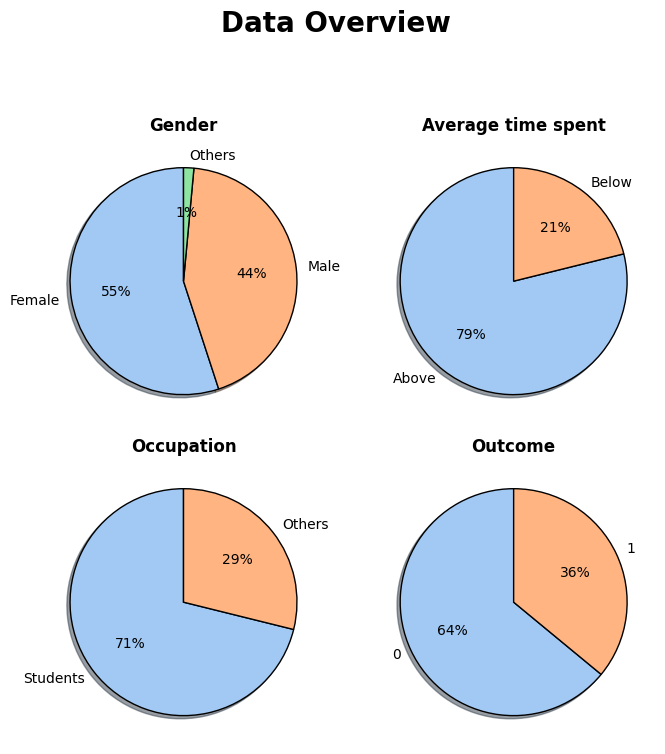

In [ ]:
J = data['Sex'].value_counts()
P = data['Average'].value_counts()
S = data['Occupation'].value_counts()
LW = data['Outcome'].value_counts()

fig, ax = plt.subplots(nrows=2, ncols=2)

colors = sns.color_palette('pastel')
plt.title('Data Overview')
plt.tight_layout()
ax[0,0].pie(J, labels=J.index, startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', shadow=True)
ax[0,0].set_title('Gender', fontweight='bold')
ax[0,1].pie(P, labels=P.index, startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', shadow=True)
ax[0,1].set_title('Average time spent', fontweight='bold')
ax[1,0].pie(S, labels=S.index, startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', shadow=True)
ax[1,0].set_title('Occupation', fontweight='bold')
ax[1,1].pie(LW, labels=LW.index, startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', shadow=True)
ax[1,1].set_title('Outcome', fontweight='bold')

fig.suptitle('Data Overview', fontsize=20, y=1.07, fontweight='bold', x=0.5)
fig.set_figheight(7)
fig.set_figwidth(7)
fig.tight_layout()

plt.show()

In [ ]:
data.describe()

,Age,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Outcome
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,26.098326,13.512552,6.169456,8.083682,9.658996,37.424686,0.359833
std,9.881942,3.866055,2.072721,2.539686,3.095075,9.232018,0.480454
min,13.000000,4.000000,2.000000,3.000000,3.000000,12.000000,0.000000
25%,21.000000,11.000000,5.000000,6.000000,8.000000,32.000000,0.000000
50%,22.000000,14.000000,6.000000,8.000000,10.000000,38.000000,0.000000
75%,26.000000,16.000000,8.000000,10.000000,12.000000,44.000000,1.000000
max,91.000000,20.000000,10.000000,15.000000,15.000000,60.000000,1.000000


Let's see the visualization between average usage time and mental health effects on university students

## Exploratory Data Analysis for School/University Students


<Axes: xlabel='Average', ylabel='count'>

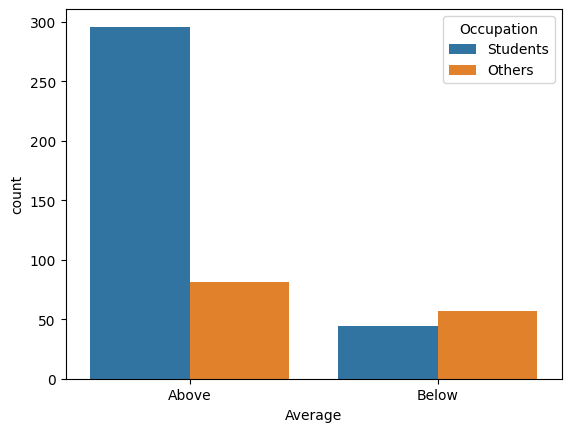

In [ ]:
sns.countplot(data=data, x='Average', hue='Occupation')

The graph above shows a significant difference in social media usage time between students and other groups. Specifically, students use social media much more than the average.

<Axes: xlabel='Average', ylabel='count'>

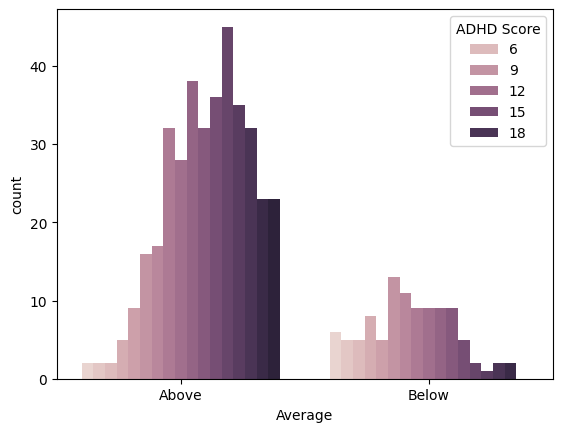

In [ ]:
sns.countplot(data=data, x='Average', hue='ADHD Score')

<Axes: xlabel='Average', ylabel='count'>

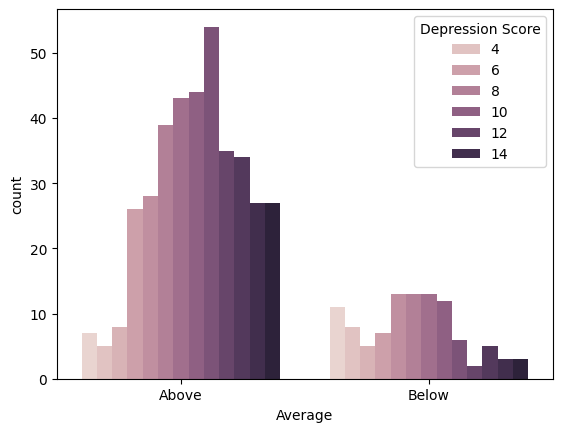

In [ ]:
sns.countplot(data=data, x='Average', hue='Depression Score')

<Axes: xlabel='Average', ylabel='count'>

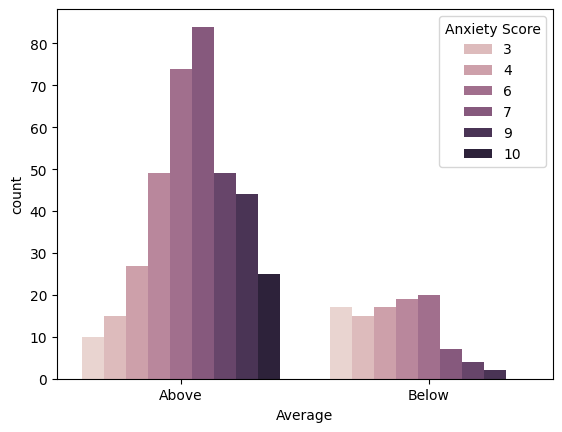

In [ ]:
sns.countplot(data=data, x='Average', hue='Anxiety Score')

<Axes: xlabel='Average', ylabel='count'>

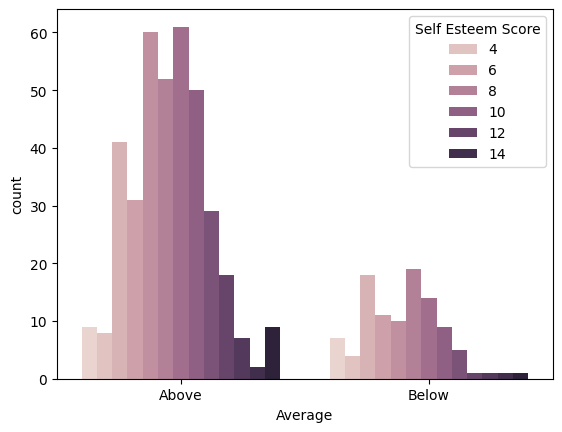

In [ ]:
sns.countplot(data=data, x='Average', hue='Self Esteem Score')

<Axes: xlabel='Average', ylabel='count'>

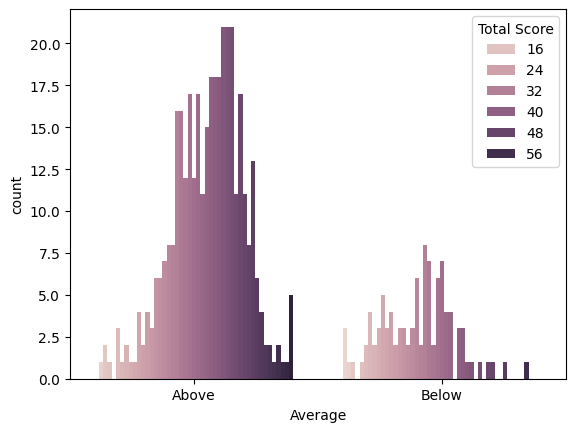

In [ ]:
sns.countplot(data=data, x='Average', hue='Total Score')

##Correlation and Heatmap

Before establishing correlations between variables, it's essential to standardize the data types across all variables.

In [ ]:
rel=set(data['Status'])
print(rel)

{'Married', 'Single', 'Divorced', 'In a relationship'}


In [ ]:
data.loc[data['Average'] == 'Below', 'Average'] = 0
data.loc[data['Average'] == 'Above', 'Average'] = 1
data.loc[data['Sex']== 'Female','Sex']=0
data.loc[data['Sex']=='Male','Sex']=1
data.loc[data['Sex']=='Others','Sex']=2
data.loc[data['Status'] == 'In a relationship', 'Status'] = 0
data.loc[data['Status'] == 'Married', 'Status'] = 1
data.loc[data['Status'] == 'Divorced', 'Status'] = 2
data.loc[data['Status'] == 'Single', 'Status'] = 3
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 480
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                478 non-null    int64 
 1   Sex                478 non-null    object
 2   Status             478 non-null    object
 3   Occupation         478 non-null    object
 4   Platforms Used     478 non-null    object
 5   Average            478 non-null    object
 6   ADHD Score         478 non-null    int64 
 7   Anxiety Score      478 non-null    int64 
 8   Self Esteem Score  478 non-null    int64 
 9   Depression Score   478 non-null    int64 
 10  Total Score        478 non-null    int64 
 11  Outcome            478 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 48.5+ KB


In [ ]:
#Converting data type from object type to int64.
data['Average'] = data['Average'].astype('int64')
data['Status'] = data['Status'].astype('int64')
data['Sex'] = data['Sex'].astype('int64')

In [ ]:
data.drop(['Total Score'], inplace = True, axis = 1)
data.corr()

<ipython-input-36-82ed7754f7d0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,Sex,Status,Average,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Outcome
Age,1.000000,0.143556,-0.276400,-0.350453,-0.301651,-0.252398,-0.062060,-0.301180,-0.159364
Sex,0.143556,1.000000,0.073124,-0.166120,-0.062449,-0.087416,-0.029053,-0.086360,-0.065165
Status,-0.276400,0.073124,1.000000,0.123759,0.099918,0.079541,0.002162,0.155782,0.055486
Average,-0.350453,-0.166120,0.123759,1.000000,0.417682,0.401242,0.154430,0.281042,0.313312
ADHD Score,-0.301651,-0.062449,0.099918,0.417682,1.000000,0.669092,0.348780,0.607876,0.657827
Anxiety Score,-0.252398,-0.087416,0.079541,0.401242,0.669092,1.000000,0.413875,0.571760,0.595457
Self Esteem Score,-0.062060,-0.029053,0.002162,0.154430,0.348780,0.413875,1.000000,0.390893,0.478676
Depression Score,-0.301180,-0.086360,0.155782,0.281042,0.607876,0.571760,0.390893,1.000000,0.653659
Outcome,-0.159364,-0.065165,0.055486,0.313312,0.657827,0.595457,0.478676,0.653659,1.000000


<ipython-input-37-b99799098ddb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(coorcolumn.corr(), linewidths=0.5, annot=True, cmap="YlGnBu")


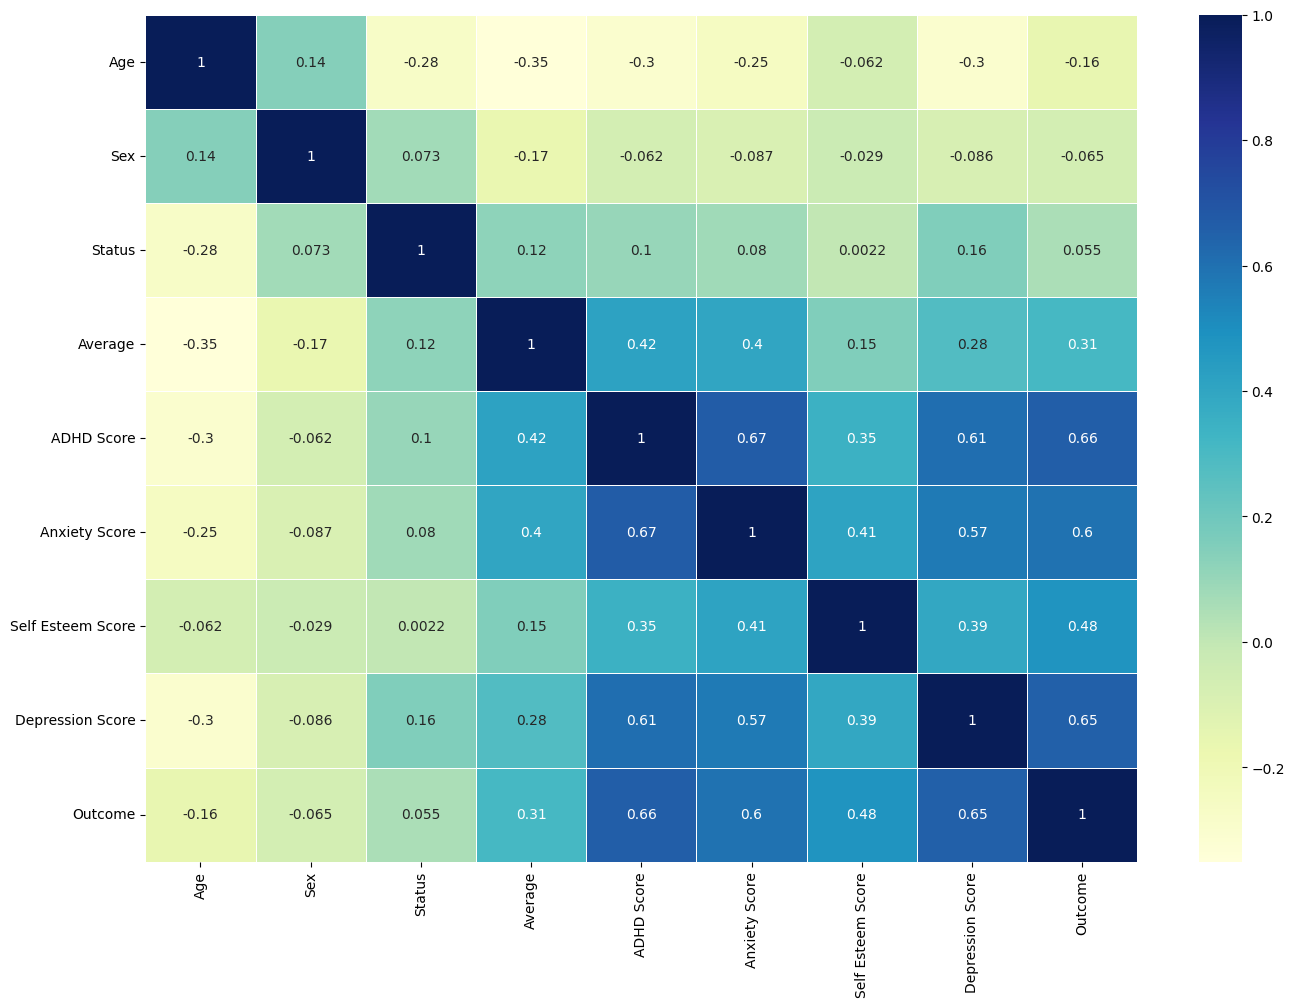

In [ ]:
coorcolumn = data
plt.figure(figsize=(16, 11))
sns.heatmap(coorcolumn.corr(), linewidths=0.5, annot=True, cmap="YlGnBu")
plt.show()


In [ ]:
data.to_csv('/content/drive/MyDrive/TETRIS Program/Capstone/mh_analysis.csv', index=False)

#Predictive Modelling

##Random Forest Classifier

In [ ]:
#importing necessary libraries for machine learning models

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pydot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
standardizer = StandardScaler()

In [ ]:
#Splitting up the data into "Train" and "Test". 80% train, 20% test.
feature = data.drop(['Outcome','Occupation','Platforms Used'],axis=1)
target = data['Outcome']

#X = standardizer.fit_transform(X)
feature_train, feature_test, target_train, target_test = train_test_split(feature, target , test_size=0.25,random_state=42)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 480
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                478 non-null    int64 
 1   Sex                478 non-null    int64 
 2   Status             478 non-null    int64 
 3   Occupation         478 non-null    object
 4   Platforms Used     478 non-null    object
 5   Average            478 non-null    int64 
 6   ADHD Score         478 non-null    int64 
 7   Anxiety Score      478 non-null    int64 
 8   Self Esteem Score  478 non-null    int64 
 9   Depression Score   478 non-null    int64 
 10  Outcome            478 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 44.8+ KB


In [ ]:
# convert data into numpy arrays
X_train = feature_train.to_numpy()
y_train = target_train.to_numpy().ravel()

In [ ]:
random_forest = RandomForestClassifier(max_depth=3,random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

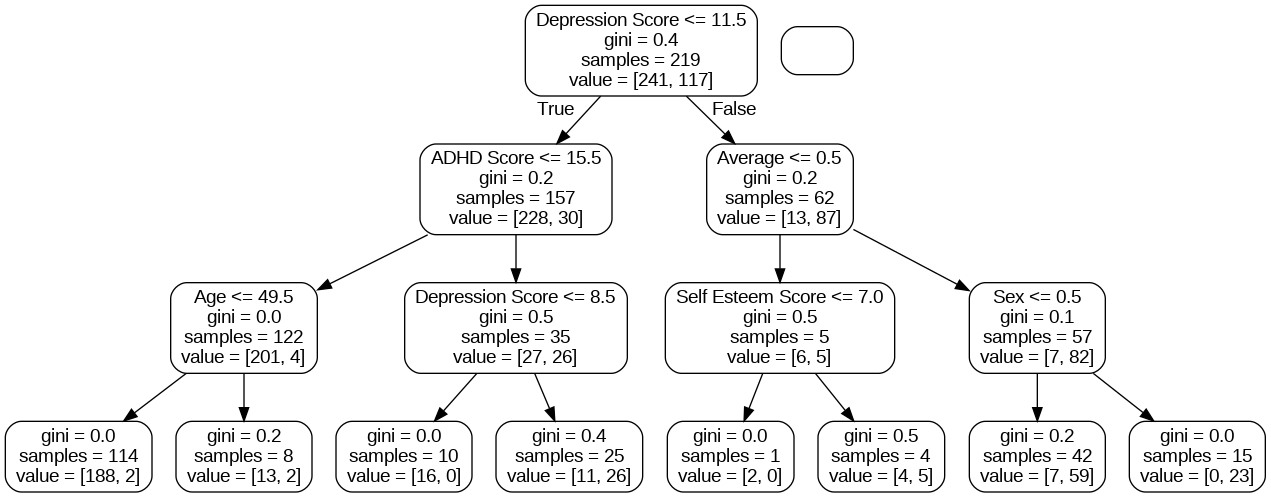

In [ ]:
tree = random_forest.estimators_[1]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
from sklearn.metrics import accuracy_score

y_predict_train = tree.predict(X_train)

print(f"Accuracy on training data is {accuracy_score(y_train,y_predict_train)}")

Accuracy on training data is 0.9217877094972067


In [ ]:
# prepare test data as numpy arrays

X_test = feature_test.to_numpy()
y_test = target_test.to_numpy().ravel()

# accuracy score on test data
y_predict_test = tree.predict(X_test)

print(f"Accuracy on test data is {accuracy_score(y_test,y_predict_test)}")

Accuracy on test data is 0.8166666666666667


##Logistic Regression

In [ ]:
#Create Logistic regression model and GaussianNB model
model = LogisticRegression()
modelNB = GaussianNB()

In [ ]:
# Call LinearRegression() to predict.
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predicted = model.predict(X_test)
accuracy= model.score(X_test,y_test)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

[[75  0]
 [ 1 44]]


In [ ]:
print("Predicted Values using Logistic Regression: ", predicted)

Predicted Values using Logistic Regression:  [0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0
 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print("Accuracy of Logistic Regression: ",metrics.accuracy_score(y_test, predicted))

Accuracy of Logistic Regression:  0.9916666666666667
